# CRYPTO ANALYSIS AND ML MODEL

In [208]:
import pandas as pd 
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import itertools
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsRegressor
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
from pylab import rcParams

def correlations_analysis(df):
    display(df.corr())
    sns.pairplot(df)
    plt.show()
    sns.heatmap(df.corr(), annot=True)
    plt.show()

# AD FULER TEST FOR STATIONALITY 
# We will look for p-value. In case, p-value is less than 0.05, the time series
# data can said to have stationarity
def stationary_test(df):
        btc_stationarityTest = adfuller(df, autolag='AIC')
        if btc_stationarityTest[1] <= 0.05:
            return print(" is stationary")
        else:
            return print(" is NOT stationary")

In [187]:
crypto_df = pd.read_csv("../final_data/crypto_series.csv")
# crypto_df = crypto_df.set_index('date')
crypto_df 

,date,btc_p,ltc_p,eth_p,xrp_p,doge_p
0,04/01/2016,426.57000,3.49300,0.9600,0.007418,0.000224
1,06/01/2016,431.32000,3.47900,0.9426,0.005809,0.000234
2,07/01/2016,429.99000,3.44000,0.9500,0.006787,0.000302
3,08/01/2016,457.88354,3.58399,0.9400,0.005906,0.000223
4,11/01/2016,449.13000,3.52817,1.0000,0.008102,0.000221
...,...,...,...,...,...,...
1282,20/12/2021,46688.40000,153.22000,3924.3700,0.879828,0.879828
1283,21/12/2021,46898.10000,152.75000,3941.8200,0.947646,0.947646
1284,22/12/2021,48925.90000,154.70000,4018.2000,0.954699,0.954699
1285,23/12/2021,48624.90000,155.41000,3980.4400,0.993285,0.993285


In [188]:
correlations_analysis(crypto_df)

# TIME SERIES ANALYSIS 

In [190]:
crypto_df = crypto_df.set_index('date')

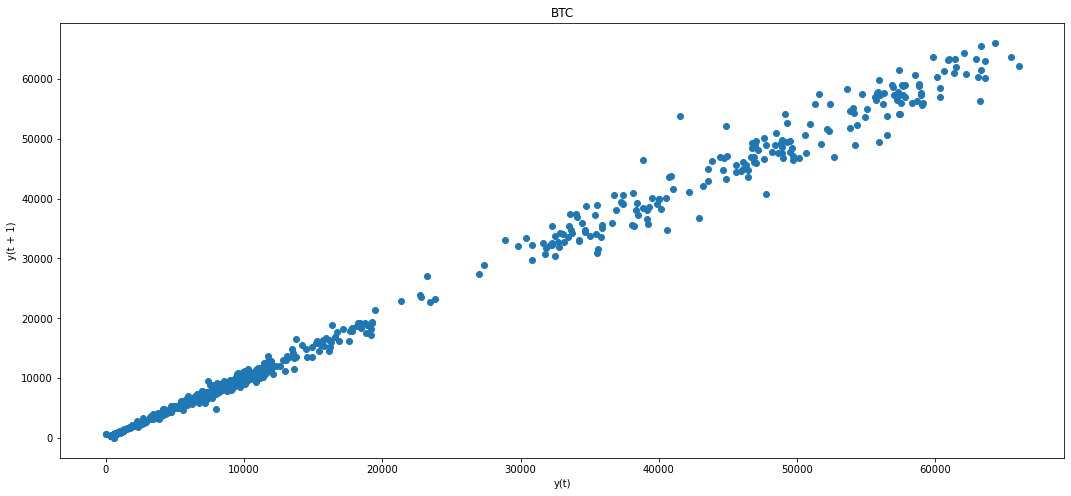

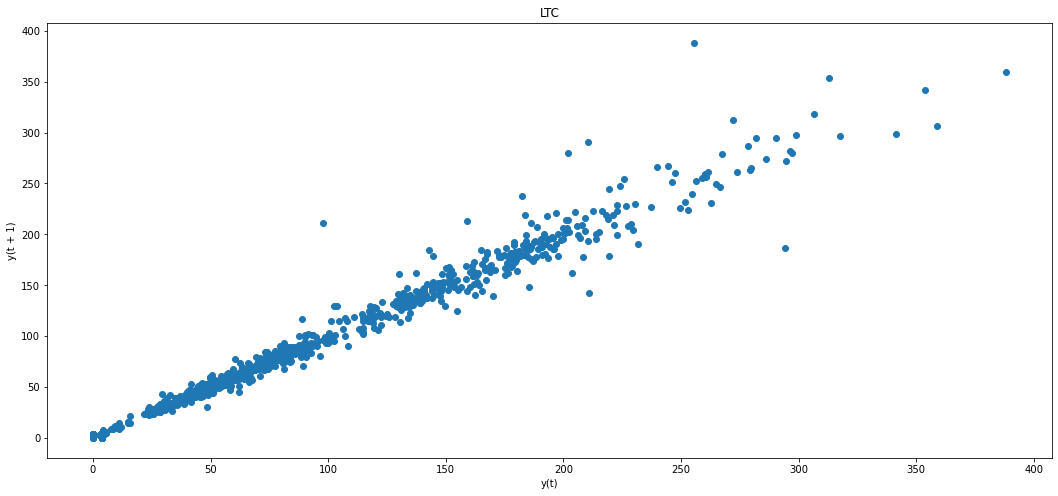

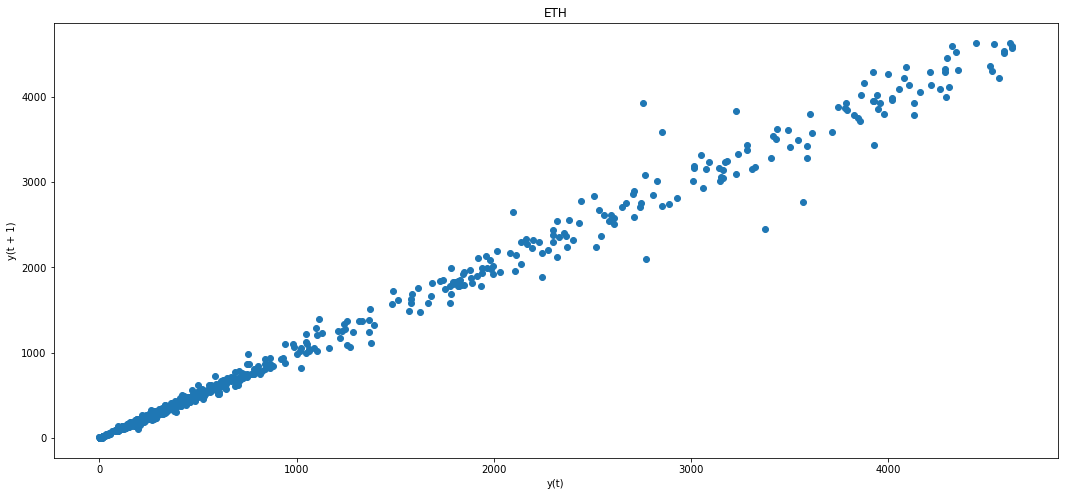

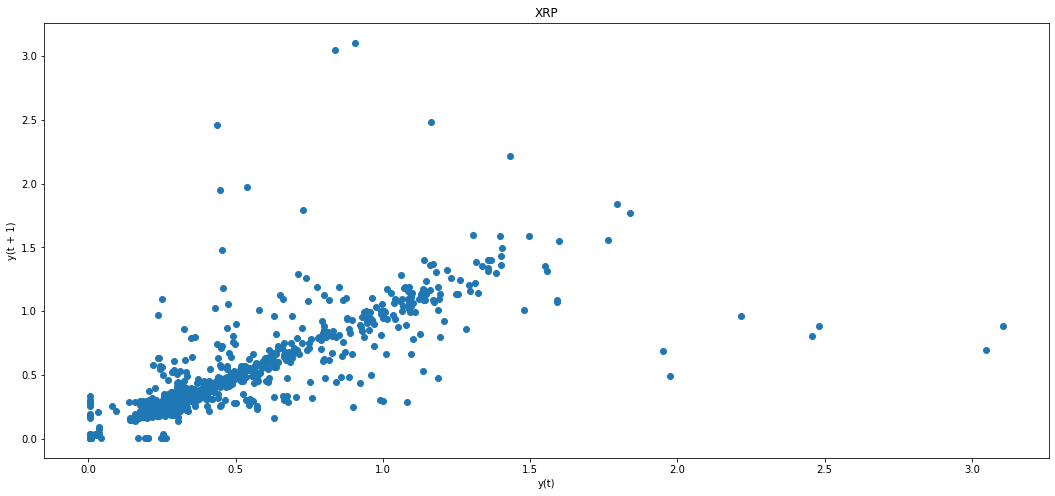

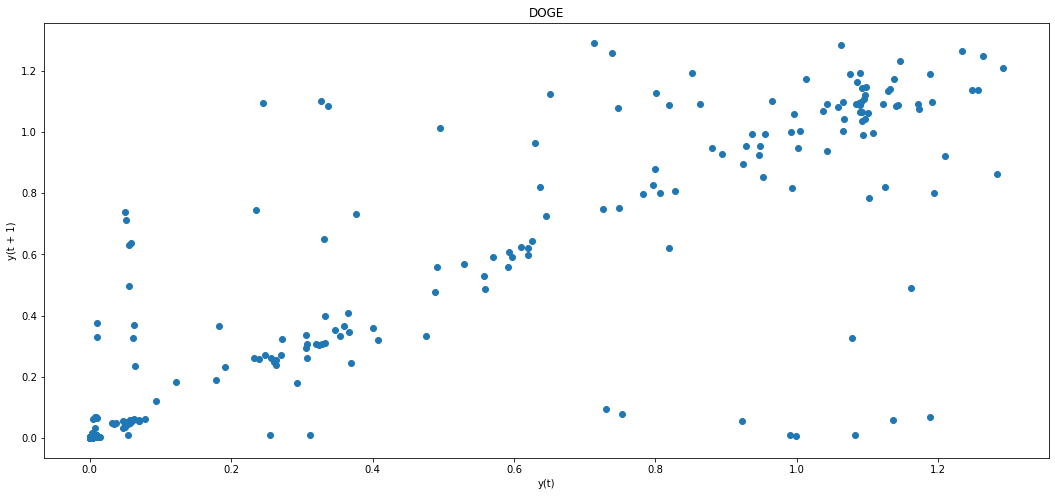

In [192]:
lag_plot(crypto_df.btc_p) 
plt.title('BTC')
plt.show()
lag_plot(crypto_df.ltc_p)
plt.title('LTC')
plt.show()
lag_plot(crypto_df.eth_p) 
plt.title('ETH')
plt.show()
lag_plot(crypto_df.xrp_p) 
plt.title('XRP')
plt.show()
lag_plot(crypto_df.doge_p) 
plt.title('DOGE')
plt.show()

In [193]:
#########################################################################################
# STRONG AUTOCORRELATION (The value for period 't' is strongly dependent from value (t-1))
# They are stringly autocorrelated at the beggigning, more stable, then flcutuations are higher when the value increases
# There is a break n the plot on BTC due t big fluctuations (EMOTION RESPONSE ? )
#########################################################################################

In [194]:
# # Separate sub DF 
BTC = crypto_df[['btc_p']]
LTC = crypto_df[['ltc_p']]
ETH = crypto_df[['eth_p']]
XRP = crypto_df[['xrp_p']]
DOGE= crypto_df[['doge_p']]

In [195]:
crypto_df.btc_p

date
04/01/2016      426.57000
06/01/2016      431.32000
07/01/2016      429.99000
08/01/2016      457.88354
11/01/2016      449.13000
                 ...     
20/12/2021    46688.40000
21/12/2021    46898.10000
22/12/2021    48925.90000
23/12/2021    48624.90000
29/12/2021    47548.10000
Name: btc_p, Length: 1287, dtype: float64

# BTC

In [198]:
# AD FULER TEST FOR STATIONALITY 
# Check for stationarity of the time-series data
# We will look for p-value. In case, p-value is less than 0.05, time series data has stationarity
stationary_test(crypto_df[['btc_p']])

 is NOT stationary


BTC  mean: 12438.668752377622


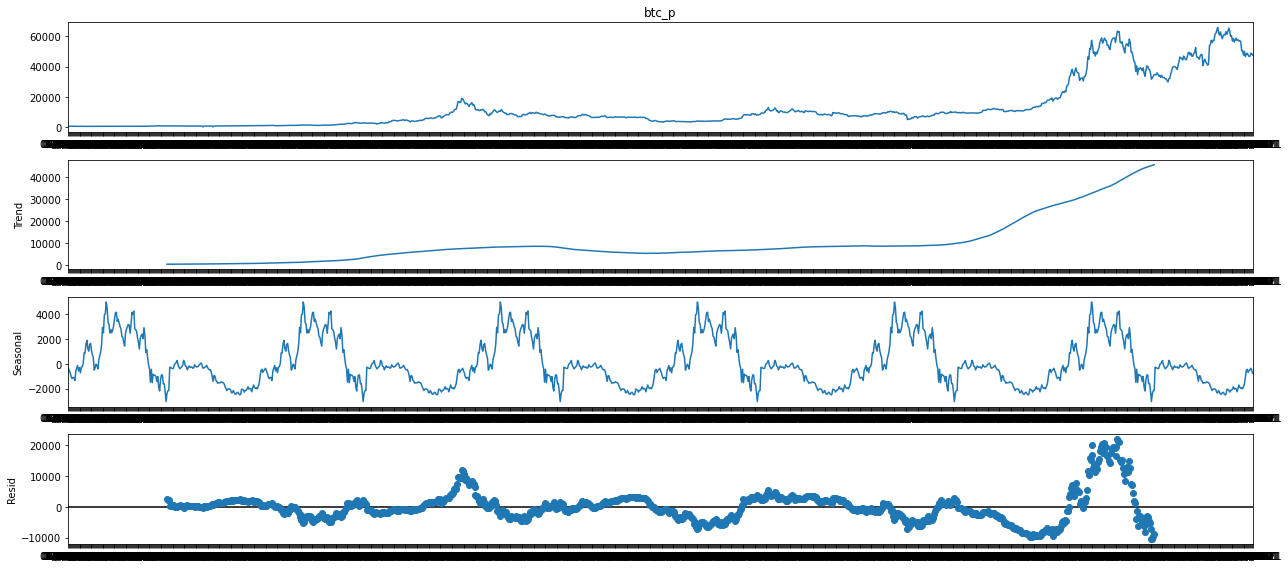

In [199]:
# # Check BTC Time Series for Seasonality:
%time
#period=214 shows the 214 days of trade as avreage on records 
rcParams['figure.figsize'] = 18, 8

res = sm.tsa.seasonal_decompose(crypto_df.btc_p, period=214,model='additive')  
print('BTC  mean:' ,crypto_df.btc_p.mean())
fig = res.plot()


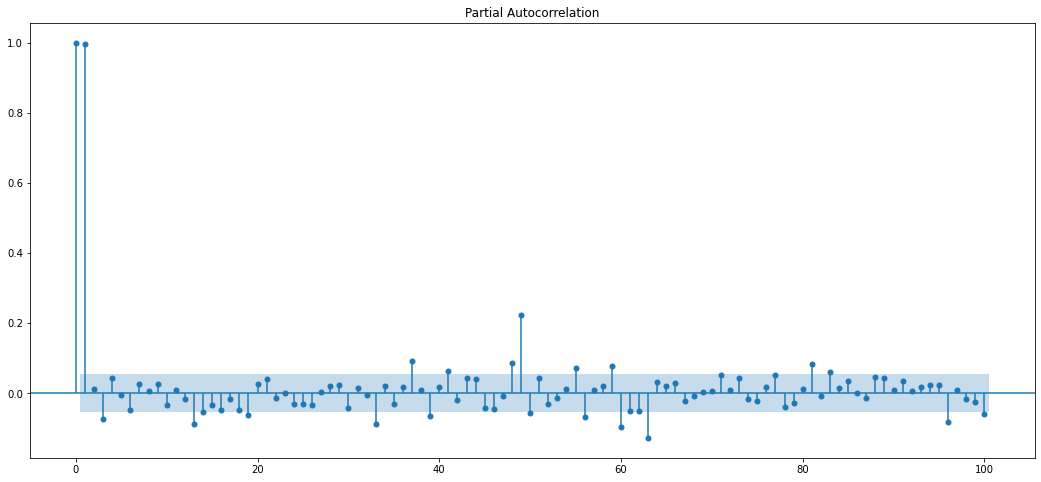

In [200]:
# Next step is to find the order of AR model to be trained
# for this, we will plot partial autocorrelation plot to assess
# the direct effect of past data on future data
pacf_100 = plot_pacf(crypto_df['btc_p'], lags=100)

/Users/chrislacarte/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/chrislacarte/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/Users/chrislacarte/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
/Users/chrislacarte/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is a

                            AutoReg Model Results                             
Dep. Variable:                  btc_p   No. Observations:                 1187
Model:                   AutoReg(300)   Log Likelihood               -7116.716
Method:               Conditional MLE   S.D. of innovations            738.349
Date:                Thu, 11 Aug 2022   AIC                             13.890
Time:                        16:26:59   BIC                             15.520
Sample:                           300   HQIC                            14.513
                                 1187                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -11.4387     58.747     -0.195      0.846    -126.582     103.704
btc_p.L1       1.0391      0.034     30.813      0.000       0.973       1.105
btc_p.L2       0.0691      0.049      1.422      0.1

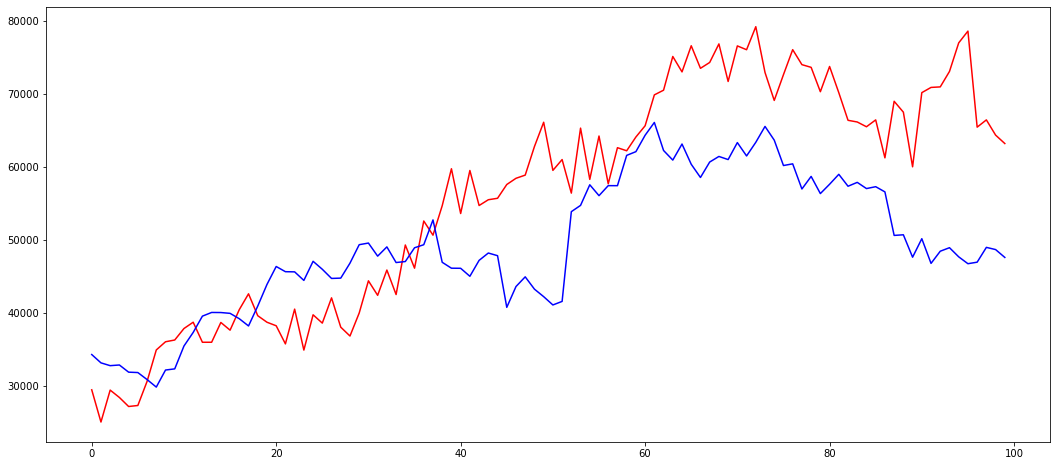

In [201]:
# AUTOREGRESSION MODEL:
    # Train Test Split
%time    
train_btc = crypto_df['btc_p'][:len(crypto_df)-100]
test_btc = crypto_df['btc_p'][len(crypto_df)-100:]
    # Instantiate and fit the AR model with training data
ar_btc = AutoReg(train_data, lags=300).fit()
    # Make the predictions
pred_ar_btc = ar_btc.predict(start=len(train_btc), end=(len(crypto_df)-1), dynamic=False)
print(ar_btc.summary())
    # Accuracy
MSE_AR_btc = mean_squared_error(test_btc, pred_ar_btc)
RMSE_AR_btc = math.sqrt(MSE_AR_btc)
pred_ar_btc_check = pred_ar_btc.reset_index(drop=True)
result_check_btc
    # Plot the prediction vs test data
plt.plot(pred_ar_btc_check, color='red')
plt.plot(result_check_btc, color='blue')

print("Root Mean Square Error:", RMSE_AR_btc)
print("Mean Square Error:     ",MSE_AR_btc)
print("error %:               " , RMSE_AR_btc/np.mean(btc_test))


In [202]:
crypto_df

,btc_p,ltc_p,eth_p,xrp_p,doge_p
date,,,,,
04/01/2016,426.57000,3.49300,0.9600,0.007418,0.000224
06/01/2016,431.32000,3.47900,0.9426,0.005809,0.000234
07/01/2016,429.99000,3.44000,0.9500,0.006787,0.000302
08/01/2016,457.88354,3.58399,0.9400,0.005906,0.000223
11/01/2016,449.13000,3.52817,1.0000,0.008102,0.000221
...,...,...,...,...,...
20/12/2021,46688.40000,153.22000,3924.3700,0.879828,0.879828
21/12/2021,46898.10000,152.75000,3941.8200,0.947646,0.947646
22/12/2021,48925.90000,154.70000,4018.2000,0.954699,0.954699


In [ ]:
    # ARIMA 
%time
train_btc = crypto_df['btc_p'][:len(crypto_df)-100]
test_btc = crypto_df['btc_p'][len(crypto_df)-100:]
model = ARIMA(train_btc, order=(100, 1, 2)) 
    # p = number of lag terms taken into account, periods back
    # d = number of times the terms are differenced
    # q = moving average window
model_fit = model.fit()
predictions_btc = model_fit.predict(len(test_btc)-100, len(test_btc)-1)

    # We convert to DF and reset index to compare with test values 
# predict_btc = pd.DataFrame(predictions_btc)
# predict_btc = predict_btc.reset_index(drop=True)
# predict_btc = predict_btc.rename({'predicted_mean':"predicted"}, axis=1)
#     # make a DF with predictions Vs actual (test) values 
#     # check_gbp = curr_btc[['usd_gbp']].tail(50)
#     # check_gbp = check_gbp.reset_index(drop=True)
# compare_btc_pred = pd.concat([test_btc,predict_btc],axis=1,join="inner",ignore_index=False,sort=False, copy=False) 
# compare_btc_pred['error'] = compare_btc_pred['btc_p'] - compare_btc_pred['predicted']
# compare_btc_pred

    # Model accuracy
MSE_ARIMA_btc = np.square(np.subtract(test_btc,predictions_btc)).mean() 
RMSE_ARIMA_btc = math.sqrt(MSE_ARIMA_btc)
    # Plot the prediction vs test data
plt.plot(test_btc, color= 'blue')
plt.plot(predictions_btc, color='red')

# plt.plot(pred_ar_btc_check)
# plt.plot(result_check_btc, color='red')

print("Root Mean Square Error: ",RMSE_ARIMA_btc)
print("Mean Square Error:      ",MSE_ARIMA_btc)
print("error %:                ",MSE_ARIMA_btc/np.mean(test_btc))

CPU times: user 12 µs, sys: 11 µs, total: 23 µs
Wall time: 161 µs


/Users/chrislacarte/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/chrislacarte/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/Users/chrislacarte/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/chrislacarte/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarni

# LTC

In [178]:
# AD FULER TEST FOR STATIONALITY 
stationary_test(crypto_df[['ltc_p']])

 is NOT stationary


In [ ]:
#period=214 shows the 214 days of trade as avreage on records 
%time
rcParams['figure.figsize'] = 18, 8

res = sm.tsa.seasonal_decompose(crypto_df.ltc_p, period=214,model='additive')
print('LTC  mean:' ,crypto_df.ltc_p.mean())
fig = res.plot()

In [ ]:
# AUTOREGRESSION MODEL:
    # Train Test Split
%time
train_ltc = crypto_df['ltc_p'][:len(crypto_df)-100]
test_ltc = crypto_df['ltc_p'][len(crypto_df)-100:]
    # Instantiate and fit the AR model with training data
ar_ltc = AutoReg(train_ltc, lags=300).fit()
    # Make the predictions
pred_ar_ltc = ar_ltc.predict(start=len(train_ltc), end=(len(crypto_df)-1), dynamic=False)
print(ar_ltc.summary())
    # Accuracy
MSE_AR_ltc = mean_squared_error(test_ltc, pred_ar_ltc)
RMSE_AR_ltc = math.sqrt(MSE_AR_ltc)
pred_ar_ltc_check = pred_ar_ltc.reset_index(drop=True)
    # Plot the prediction vs test data
plt.plot(pred_ar_ltc, color='red')
plt.plot(test_ltc, color='blue')

print("Root Mean Square Error:", RMSE_AR_ltc)
print("Mean Square Error:     ",MSE_AR_ltc)
print("error %:               " , RMSE_AR_ltc/np.mean(test_ltc))


# ETH 

In [180]:
# AD FULER TEST FOR STATIONALITY 
stationary_test(crypto_df[['eth_p']])

 is NOT stationary


In [ ]:
# # Check features for Seasonality with the complete DF curr_btc:

#period=214 shows the 214 days of trade as avreage on records 
rcParams['figure.figsize'] = 18, 8

res = sm.tsa.seasonal_decompose(crypto_df.eth_p, period=214,model='additive') 
print('ETH  mean:' ,crypto_df.eth_p.mean())
fig = res.plot()

In [ ]:
# AUTOREGRESSION MODEL:
    # Train Test Split
%time   
train_eth = crypto_df['eth_p'][:len(crypto_df)-100]
test_eth = crypto_df['eth_p'][len(crypto_df)-100:]
    # Instantiate and fit the AR model with training data
ar_btc = AutoReg(train_btc, lags=300).fit()
    # Make the predictions
pred_ar_btc = ar_btc.predict(start=len(train_btc), end=(len(crypto_df)-1), dynamic=False)
print(ar_model.summary())
    # Accuracy
MSE_AR_btc = mean_squared_error(test_btc, pred_ar_btc)
RMSE_AR_btc = math.sqrt(MSE_AR_btc)
pred_ar_btc_check = pred_ar_btc.reset_index(drop=True)
result_check_btc
    # Plot the prediction vs test data
plt.plot(pred_ar_btc_check, color='red')
plt.plot(result_check_btc, color='blue')

print("Root Mean Square Error:", RMSE_AR_btc)
print("Mean Square Error:     ",MSE_AR_btc)
print("error %:               " , RMSE_AR_btc/np.mean(btc_test))


# XRP

In [182]:
# AD FULER TEST FOR STATIONALITY 
stationary_test(crypto_df[['xrp_p']])

 is NOT stationary


In [ ]:
# # Check features for Seasonality with the complete DF curr_btc:
#period=214 shows the 214 days of trade as avreage on records 
rcParams['figure.figsize'] = 18, 8
res = sm.tsa.seasonal_decompose(crypto_df.xrp_p, period=214,model='additive') 
print('XRP  mean:' ,crypto_df.xrp_p.mean())
fig = res.plot()

In [ ]:
# AUTOREGRESSION MODEL:
    # Train Test Split
%time
train_xrp = crypto_df['xrp_p'][:len(crypto_df)-100]
test_xrp = crypto_df['xrp_p'][len(crypto_df)-100:]
    # Instantiate and fit the AR model with training data
ar_xrp = AutoReg(train_xrp, lags=300).fit()
    # Make the predictions
pred_ar_xrp = ar_xrp.predict(start=len(train_xrp), end=(len(crypto_df)-1), dynamic=False)
print(ar_xrp.summary())
    # Accuracy
MSE_AR_xrp = mean_squared_error(test_xrp pred_ar_xrp)
RMSE_AR_xrp = math.sqrt(MSE_AR_xrp)
pred_ar_xrp_check = pred_ar_xrp.reset_index(drop=True)
result_check_xrp
    # Plot the prediction vs test data
plt.plot(pred_ar_xrp_check, color='red')
plt.plot(result_check_xrp, color='blue')

print("Root Mean Square Error:", RMSE_AR_xrp)
print("Mean Square Error:     ",MSE_AR_xrp)
print("error %:               " , RMSE_AR_xrp/np.mean(test_xrp))


# DOGE

In [ ]:
# AD FULER TEST FOR STATIONALITY 
stationary_test(crypto_df[['doge_p']])

In [ ]:
# # Check features for Seasonality with the complete DF curr_btc:
#period=214 shows the 214 days of trade as avreage on records 
rcParams['figure.figsize'] = 18, 8

res = sm.tsa.seasonal_decompose(crypto_df.doge_p, period=214,model='additive') 
print('DOGE mean:' ,crypto_df.doge_p.mean())
fig = res.plot()

In [ ]:
# AUTOREGRESSION MODEL:
    # Train Test Split
train_doge = crypto_df['doge_p'][:len(crypto_df)-100]
test_doge = crypto_df['doge_p'][len(crypto_df)-100:]
    # Instantiate and fit the AR model with training data
ar_doge = AutoReg(train_doge, lags=300).fit()
    # Make the predictions
pred_ar_doge = ar_doge.predict(start=len(train_doge), end=(len(crypto_df)-1), dynamic=False)
print(ar_model.summary())
    # Accuracy
MSE_AR_doge = mean_squared_error(test_doge, pred_ar_doge)
RMSE_AR_doge = math.sqrt(MSE_AR_doge)
pred_ar_doge_check = pred_ar_doge.reset_index(drop=True)
result_check_doge
    # Plot the prediction vs test data
plt.plot(pred_ar_doge_check, color='red')
plt.plot(result_check_doge, color='blue')

print("Root Mean Square Error:", RMSE_AR_doge)
print("Mean Square Error:     ",MSE_AR_doge)
print("error %:               " , RMSE_AR_doge/np.mean(test_doge))
